## CT data preprocessing

In [1]:
#!pip install opencv-python

import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [2]:
def read_ct_img_bydir(target_dir):
    img=cv2.imdecode(np.fromfile(target_dir,dtype=np.uint8),cv2.IMREAD_GRAYSCALE)
    #img = corp_margin(img)
    img=cv2.resize(img,(200,200))
    
    return img

In [3]:
def get_data():
    '''Loads raw data from image names of each class folder and assigns a label to it.'''
    
#     target_dir1='/home/adduser/code/NinLev/Covid_19/raw_data/labeled_CT_data/niCT'
#     target_dir2='/home/adduser/code/NinLev/Covid_19/raw_data/labeled_CT_data/pCT'
#     target_dir3='/home/adduser/code/NinLev/Covid_19/raw_data/labeled_CT_data/nCT'
    
    target_dir1='../raw_data/labeled_CT_data/test_CT/'
    target_dir2='../raw_data/labeled_CT_data/test_CT_2/'
    target_dir3='../raw_data/labeled_CT_data/test_CT_3/'

    target_list1=[target_dir1+file for file in os.listdir(target_dir1)]
    target_list2=[target_dir2+file for file in os.listdir(target_dir2)]
    target_list3=[target_dir3+file for file in os.listdir(target_dir3)]

    target_list=target_list1+target_list2+target_list3

    # Assign labels: 0: 'non informative CT'
    #                1: 'positive Covid-19 CT'
    #                2: 'negative Covid-19 CT'
    y_list=to_categorical(np.concatenate(np.array([[0]*len(target_list1),
                                               [1]*len(target_list2),
                                               [2]*len(target_list3)])),3)

    X=np.array([read_ct_img_bydir(file) for file in target_list])[:,:,:,np.newaxis]

    return X, y_list


In [4]:
X,y = get_data()

In [5]:
X.shape

(30, 200, 200, 1)

In [6]:
X[0].shape

(200, 200, 1)

In [7]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

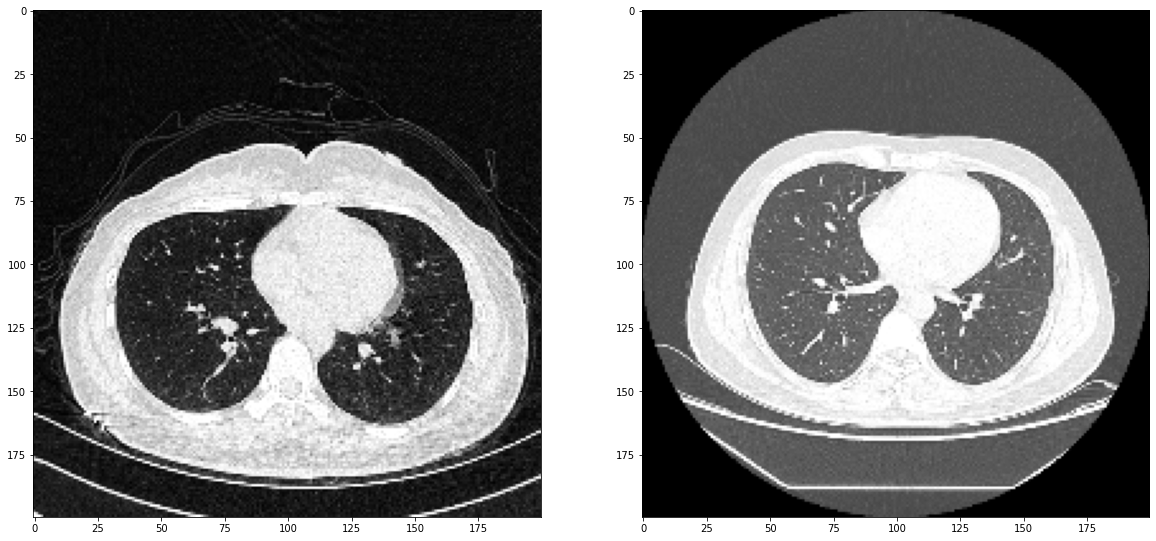

In [7]:
plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
plt.imshow(X[0], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(X[9], cmap="gray");

In [8]:
#os.listdir()
#os.listdir('../raw_data/labeled_CT_data/test_CT/')

In [9]:
# def corp_margin(img2):
#     img2=np.asarray(img2)
#     (row, col) = img2.shape
    
#     row_top = 0
#     row_down = 0
#     col_top = 0
#     col_down = 0
    
#     axis1=img2.sum(axis=1)
#     axis0=img2.sum(axis=0)
    
#     for r in range(0, row):
#         if axis1[r] > 30:
#             row_top = r
#             break
            
#     for r in range(row - 1, 0, -1):
#         if axis1[r] > 30:
#             row_down = r
#             break
            
#     for c in range(0, col):
#         if axis0[c] > 30:
#             col_top = c
#             break
            
#     for c in range(col - 1, 0, -1):
#         if axis0[c] > 30:
#             col_down = c
#             break
            
#     a=row_down+ 1 - row_top-(col_down+ 1-col_top)
    
#     if a>0:
#             w=row_down+ 1-row_top
#             col_down=int((col_top+col_down + 1)/2+w/2)
#             col_top = col_down-w
            
#             if col_top < 0:
#                 col_top = 0
#                 col_down = col_top + w
#             elif col_down >= col:
#                 col_down = col - 1
#                 col_top = col_down - w
#     else:
#             w=col_down + 1- col_top
#             row_down = int((row_top + row_down + 1) / 2 + w/2)
#             row_top =  row_down-w
            
#             if row_top < 0:
#                 row_top = 0
#                 row_down = row_top + w
#             elif row_down >= row:
#                 row_down = row - 1
#                 row_top = row_down - w
                
#     if row_top==row_down:
#         row_top=0
#         row_down=99
#         col_top = 0
#         col_down = 99
        
#     new_img = img2[row_top:row_down + 1, col_top:col_down + 1]
    
#     return new_img


In [10]:
#target_dir = '~/code/NinLev/Covid_19/raw_data/labeled_CT_data/'